In [1]:
import keras
keras.__version__

'2.9.0'

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
  نخستین نگاه به شبکه عصبی 
  <br><br>
  <font size="+1" face="homa">
  فصل ۲ قسمت ۱ 
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
 ابتدا، با یک مثال عملی شبکه عصبی شروع می‌کنیم که از کتابخانه کراس پایتون برای یادگیری دسته‌بندی ارقام دست‌نوشته استفاده می‌کند. در صورتی که هیچ تجربه‌ای از کراس یا کتابخانه‌های مشابه نداشته باشید، نخواهید توانست بلافاصله این مثال را درک کنید. شاید، هنوز حتی کراس را نصب نکرده‌اید؛ اشکالی ندارد. در فصل بعدی، هرکدام از اجزای مثال را مرور کرده و به طور مفصل توضیح خواهیم داد؛ بنابراین، اگر برخی از مراحل به نظرتان دلخواه یا جادویی می‌رسند نگران نباشید. بالاخره باید از جایی شروع کنید.

<br>
مسئله‌ای که می‌خواهیم در اینجا حل کنیم، دسته‌بندی تصاویر سیاه ‌و سفید  ارقام دست‌نوشته (۲۸×۲۸ پیکسل) به ۱۰ دسته (۰ تا ۹) مربوط به خودشان است. ما از مجموعه ‌داده MNIST استفاده خواهیم کرد که در جامعه یادگیری ماشین مشهور بوده و قدمت آن به ‌اندازه قدمت خود این رشته است و بارها و بارها مورد مطالعه قرارگرفته است. این مجموعه ‌داده متشکل از شصت هزار تصویر آموزشی به ‌علاوه ده هزار تصویر برای آزمایش است که موسسه ملی استاندارد و فناوری (بخش NIST از عنوان MNIST) در دهه ۱۹۸۰ آن‌ها را جمع‌آوری نموده است. می‌توان «حل کردن» MNIST را «سلام دنیا»ی یادگیری عمیق دانست. این کاری است که برای تشخیص کارکرد صحیح الگوریتم‌ها انجام می‌شود. با کار کردن در زمینه یادگیری ماشین خواهید دید که بارها و بارها در مقالات علمی، وبلاگ‌ها و غیره با MNIST روبرو می‌شوید.

<p dir="rtl" align="justify">
<font face="Vazir">
مجموعه ‌داده MNIST، به شکل مجموعه‌ای از چهار آرایه نام‌پای ، پیشاپیش در کراس بارگذاری شده است.
</font>
</p>

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


<p dir="rtl" align="justify">
<font face="homa">
train_images و train_labels از مجموعه آموزشی، داده‌هایی هستند که مدل یاد خواهد گرفت. سپس، مدل با مجموعه آزمایش  test_images و test_labels مورد آزمایش قرار خواهد گرفت.
تصاویر به عنوان آرایه‌های نام‌پای کدگذاری می‌شوند و برچسب‌ها آرایه‌ا‌ی از ارقام هستند که دامنه‌شان از صفر تا ۹ است. تصاویر و برچسب‌ها یک‌به‌یک با همدیگر مطابقت دارند.
<br><br>
داده‌های آموزشی به شکل زیر می‌باشند:

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<p dir="rtl" align="justify">
<font face="homa">
و داده‌های آزمایش بدین قرار هستند:

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

<p dir="rtl" align="justify">
<font face="homa">
روند کار بدین شکل خواهد بود: ابتدا، داده‌های آموزشی را به عنوان ورودی به شبکه عصبی خواهیم داد؛ train_images و train_labels. سپس، شبکه ارتباط تصاویر و برچسب‌ها به همدیگر را یاد خواهد گرفت. نهایتاً، از شبکه خواهیم خواست تا پیش‌بینی‌هایی را برای test_images تولید کند و همخوانی یا عدم همخوانی این پیش‌بینی‌ها با برچسب‌های test_labels را بررسی خواهیم کرد.
<br><br>
حال می‌خواهیم شبکه را بسازیم. مجدداً به خاطر داشته باشید که هنوز از شما انتظار نمی‌رود که همه مسائل این مثال را درک کنید.

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


<p dir="rtl" align="justify">
<font face="homa">
اصلی‌ترین بلوک سازنده شبکه‌های عصبی، لایه است. لایه، عبارت است از ماژول پردازش داده‌ها که می‌توان آن‌ را فیلتر داده‌ها دانست. داده‌ها وارد شبکه شده و به شکل مناسب‌تری از آن خارج می‌شوند. بالأخص، لایه‌ها از داده‌های وارد شده بازنمایی‌ها  را استخراج می‌کنند (در بهترین حالت، بازنمایی‌هایی که برای مسئله موردنظر ما معنادارتر هستند). یادگیری عمیق عمدتاً شامل به هم پیوستن لایه‌های ساده‌ای است که نوعی عصاره‌گیری مرحله‌به‌مرحله  را اجرا خواهند کرد. مدل یادگیری عمیق شبیه یک غربال برای پردازش داده‌هاست، لایه‌ها به عنوان فیلترهای داده‌ای عمل می‌کنند که رفته‌رفته پالایش می‌شوند.
<br><br>
در اینجا، شبکه ما متشکل از دولایه متراکم  متوالی است، اتصال بین این لایه‌ها متراکم است و از این رو لایه‌های تمام متصل  نیز نامیده می‌شوند دومین (آخرین) لایه، یک‌لایه با ۱۰-خروجی است که سافت‌مکس  نامیده می‌شود، یعنی آرایه‌ای با ۱۰ امتیاز احتمال (که مجموعشان برابر یک است) را باز خواهد گرداند. هر امتیاز، عبارت از احتمالی خواهد بود که بیانگر احتمال تعلق تصویر مورد نظر به یکی از کلاس‌های ۱۰ رقمی ما را نشان می‌دهد.
<br><br>
به‌منظور آماده کردن شبکه برای آموزش، باید سه مورد زیر را به عنوان بخشی از مرحله کامپایل  در نظر بگیریم:
<br>

<ul dir="rtl">
  <li>تابع هزینه: شبکه چگونه خواهد توانست عملکرد خود در مورد داده‌های آموزشی را ارزیابی نماید و بدین ترتیب چگونه خواهد توانست خودش را به مسیر درست هدایت کند.</li>
</ul>

<ul dir="rtl">
  <li>	بهینه‌ساز: مکانیسمی است که شبکه به ‌واسطه آن خود را به‌روز خواهد کرد. به‌روزرسانی بر مبنای تابع هزینه و داده‌هایی است که شبکه به عنوان ورودی دریافت می‌کند.</li>
</ul>

<ul dir="rtl">
  <li>	معیار‌هایی که در طول آموزش و آزمایش ثبت می‌شوند: در اینجا، تنها معیار دقت را مورد استفاده قرار می‌دهیم (تعداد تصاویری که به‌ درستی دسته‌بندی شده‌اند).</li>
</ul>

<p dir="rtl" align="justify">
<font face="Vazir">
هدف دقیق تابع هزینه و بهینه‌ساز در دو فصل بعدی کاملاً روشن خواهد شد.

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

<p dir="rtl" align="justify">
<font face="homa">
قبل از آموزش، داده‌ها پیش‌پردازش می‌شوند؛ یعنی شکل آن‌ها به صورتی تغییر داده می‌شود که شبکه انتظارش را دارد و نیز مقادیر آن به ‌گونه‌ای مقیاس بندی می‌شود که در بازه [0,1] قرار بگیرند. به عنوان مثال، تصاویر آموزشی ما قبلاً در آرایه‌ای به شکل (28 ,28 ,60000) و نوع unit8 و با مقادیری در بازه [0,255] ذخیره شده بودند. ما آن‌ها را به صورت آرایه float32 به شکل (28*28 ,60000) با مقادیر بین 0 و 1 تبدیل می‌کنیم.

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

<p dir="rtl" align="justify">
<font face="homa">
همچنین، باید برچسب‌ها را بر اساس دسته‌ای که به آن تعلق دارند کدگذاری کنیم؛ این گام را در فصل ۳ توضیح خواهیم داد.

In [12]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

<p dir="rtl" align="justify">
<font face="homa">
حال آماده آموزش شبکه هستیم. در کراس آموزش از طریق فراخوانی متد fit صورت می‌گیرد. ما مدل را براساس داده‌های آموزشی‌اش برازش  می‌کنیم:

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 4ms/step - loss: 0.2567 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1026 - accuracy: 0.9703
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0677 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0492 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0372 - accuracy: 0.9888


<p dir="rtl" align="justify">
<font face="homa">
دو کمیت در طول آموزش نمایش داده می‌شوند: خطا و دقت شبکه روی داده‌های آموزشی. 
<br><br>
ما به‌ سرعت به دقت ۹۸۹/. (۹۸.۹٪) در داده‌های آموزشی رسیدیم. اکنون اجازه دهید که مدل را در مجموعه آزمایش نیز بررسی کنیم:

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9798


In [15]:
print('test_acc:', test_acc)

test_acc: 0.9797999858856201


1/1 [==============================] - 0s 22ms/step
Lable: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Lable: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


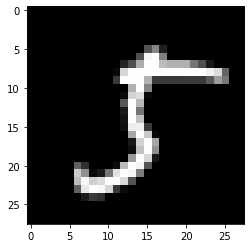

In [50]:
import matplotlib.pyplot as plt
import numpy as np

img_inx = np.random.randint(0, len(test_images))

pre = np.round(network.predict(test_images[img_inx:img_inx + 1]), 2)
plt.imshow(np.reshape(test_images[img_inx], [28, 28]), cmap='gray')

print(f'Lable: {test_labels[img_inx]}')
print(f'Predicted Lable: {pre}')

<p dir="rtl" align="justify">
<font face="homa">
میزان دقت مجموعه آزمایش ۹۷.۹٪ می‌شود که خیلی کمتر از میزان دقت مجموعه آموزش است. این شکاف بین دقت آموزش و دقت آزمایش نمونه‌ای از بیش برازش است؛ یعنی گویای این واقعیت است که مدل‌های یادگیری ماشین روی ‌داده‌های جدید، نسبت به داده‌های آموزشی خودشان، عملکرد بدتری دارند. بیش برازش  عنوانی مهم است که در فصل ۳ در مورد آن بحث شده است.
<br><br>
در مثال اول دیدیم که چگونه می‌توان برای دسته‌بندی ارقام دست‌نوشته در کمتر از ۲۰ خط کد پایتون، یک شبکه عصبی ساخته و آن را آموزش داد. در فصل بعدی، هر کدی که به صورت گذرا اینجا مرور کردیم، به ‌تفصیل بیان خواهیم کرد و همه آنچه را که در پشت پرده‌ می‌گذرد به طور کامل توضیح خواهیم داد. مطالبی که در فصل بعدی یاد خواهید گرفت عبارت‌ هستند از: تنسورها که ذخیره کننده داده‌ها بوده و به عنوان ورودی به شبکه ارسال می‌شوند؛ عملیات تنسورها که لایه‌ها از آن ساخته‌شده‌اند؛ و گرادیان نزولی که امکان یادگیری از مثال‌های آموزشی را برای شبکه شما ممکن می‌سازد.